## Libreries

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt 
# !pip install Levenshtein
import Levenshtein as lev
import networkx as nx

## Data

In [729]:
%%time
file_path = "../data/df_A2019_v2.xlsx"
df = pd.read_excel(file_path)
columns = "respuesta_id pregunta_id pregunta respuesta tipo_preg C1 C1_iid".split()
df = df[columns]
df

Wall time: 1.37 s


,respuesta_id,pregunta_id,pregunta,respuesta,tipo_preg,C1,C1_iid
0,127991,6976,Redacta un problema de ADICIÓN. El problema de...,amaru tine 15 autos y mi primo me regalo 15 ma...,5,0,0
1,128001,6976,Redacta un problema de ADICIÓN. El problema de...,Andrea quiene 100 \nfloles y su mama reran 2...,5,0,0
2,127987,6976,Redacta un problema de ADICIÓN. El problema de...,juan tiene 5 autos y su amigo le regalo 4 ¿c...,5,0,0
3,127979,6976,Redacta un problema de ADICIÓN. El problema de...,un perro85848548\n,5,1,0
4,127990,6976,Redacta un problema de ADICIÓN. El problema de...,David tenia trenta chocolate y su mama le dio...,5,0,0
...,...,...,...,...,...,...,...
14452,153230,9351,Tres granjas compiten para ver quién produjo m...,quien produjo mas alimento fue la granja b por...,4,0,0
14453,153231,9351,Tres granjas compiten para ver quién produjo m...,la granja que produjo mas alimento es la B,4,0,0
14454,153232,9351,Tres granjas compiten para ver quién produjo m...,la granja que ai mas alimentos esla granja b...,4,0,0
14455,153233,9351,Tres granjas compiten para ver quién produjo m...,lab produjo mas alimento porque tenia de alim...,4,1,0


In [730]:
Q = df["pregunta_id pregunta".split()]
Q = Q.drop_duplicates(keep="last")
Q

,pregunta_id,pregunta
14,6976,Redacta un problema de ADICIÓN. El problema de...
23,6843,"Lorena recibió un chocolate de regalo, ella co..."
25,6847,¿Qué problemas ha detectado durante el juego?
27,6851,Lorena tiene un billete de $5 000 y quiere cam...
30,6857,"Lorena recibió un chocolate de regalo, ella co..."
...,...,...
14411,9333,"Pamela destapa su piscina de 100,2 litros en v..."
14424,9334,"Pamela destapa su piscina de 100,2 litros en v..."
14434,9348,Tres granjas compiten para ver quién produjo m...
14448,9349,Ana y Felipe ponen 2 pelotitas dentro de 6 rec...


In [731]:
%%time
dict_distances = {}
for i, ix in enumerate(Q["pregunta_id"]):
    Qi = Q[Q["pregunta_id"] == ix].iloc[0]["pregunta"]
    for jx in Q["pregunta_id"].iloc[i+1:]:
        Qj = Q[Q["pregunta_id"] == jx].iloc[0]["pregunta"]
        dict_distances[(ix, jx)] = lev.distance(Qi, Qj)

Wall time: 54.6 s


In [732]:
# sorted(dict_distances.items(), key=lambda x: x[1])
dict_lev = {}
for k, v in dict_distances.items():
    if v not in dict_lev.keys():
        dict_lev[v] = []
    dict_lev[v].append(k)

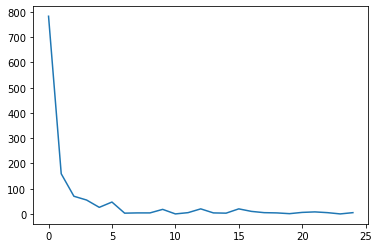

In [733]:
plt.plot([len(dict_lev[i]) if i in dict_lev else 0 for i in range(0, 25)])

In [734]:
manual_matching = {
 (7017, 8935),
 (7019, 7006),
 (7019, 8888),
 (7019, 8895),
 (7019, 8927),
 (7019, 8935),
 (7020, 7006),
 (7020, 8888),
 (7020, 8927),
 (7020, 8935),
 (7076, 7078),
 (7076, 7107),
 (7116, 7118),
 (7116, 7120),
 (7131, 7078),
 (7131, 7107),
 (7151, 8970),
 (7151, 8971),
 (7159, 7165),
 (7162, 7159),
 (7162, 7165),
 (7167, 7159),
 (7167, 7165),
 (7230, 7259),
 (7230, 7262),
 (7230, 7263),
 (7230, 7264),
 (7259, 7262),
 (7259, 7263),
 (7259, 7264),
 (7276, 7283),
 (7280, 7283),
 (7306, 8970),
 (7306, 8971),
 (7309, 7320),
 (7315, 8970),
 (7315, 8971),
 (7326, 7330),
 (7336, 7330),
 (7338, 7341),
 (7338, 7350),
 (7339, 7330),
 (7340, 7343),
 (7340, 7345),
 (7340, 7349),
 (7346, 7013),
 (7352, 7330),
 (7353, 7330),
 (7355, 7330),
 (7365, 7362),
 (7408, 7419),
 (7411, 7415),
 (7418, 7406),
 (7418, 7410),
 (7418, 7414),
 (7453, 8533),
 (7455, 8533),
 (7459, 8533),
 (7461, 8533),
 (7467, 7463),
 (7473, 7463),
 (7477, 7463),
 (7500, 8970),
 (7500, 8971),
 (7533, 8970),
 (7533, 8971),
 (7535, 8970),
 (7535, 8971),
 (7566, 7579),
 (7570, 7579),
 (7599, 7586),
 (7600, 7585),
 (7600, 8673),
 (7600, 8686),
 (7603, 7585),
 (7603, 8673),
 (7603, 8686),
 (7604, 7586),
 (7607, 7586),
 (7623, 7671),
 (7626, 7610),
 (7626, 7611),
 (7628, 8970),
 (7628, 8971),
 (7629, 7764),
 (7635, 8970),
 (7635, 8971),
 (7667, 8970),
 (7667, 8971),
 (7624, 7671),
 (7701, 7797),
 (7701, 8470),
 (7705, 7698),
 (7710, 7698),
 (7710, 7705),
 (7765, 8970),
 (7765, 8971),
 (7798, 7764),
 (7962, 7764),
 (7995, 7764),
 (8002, 9324),
 (8028, 9324),
 (8029, 8030),
 (8029, 8031),
 (8029, 8032),
 (8029, 8037),
 (8194, 8391),
 (8194, 8461),
 (8194, 8467),
 (8194, 8472),
 (8195, 8128),
 (8195, 8293),
 (8195, 8325),
 (8228, 7703),
 (8228, 7711),
 (8228, 7769),
 (8228, 7863),
 (8228, 7996),
 (8228, 8094),
 (8228, 8229),
 (8231, 7703),
 (8231, 7711),
 (8231, 7769),
 (8231, 7863),
 (8231, 7996),
 (8231, 8094),
 (8231, 8229),
 (8467, 8391),
 (8467, 8461),
 (8467, 8472),
 (8480, 8475),
 (8482, 8970),
 (8482, 8971),
 (8487, 8475),
 (8494, 8475),
 (8509, 8970),
 (8509, 8971),
 (8516, 8970),
 (8516, 8971),
 (8530, 8970),
 (8530, 8971),
 (8534, 8970),
 (8534, 8971),
 (8614, 8620),
 (8614, 8627),
 (8621, 8612),
 (8621, 8630),
 (8621, 8665),
 (8621, 8770),
 (8621, 8789),
 (8621, 8824),
 (8621, 8831),
 (8621, 8837),
 (8632, 8612),
 (8632, 8630),
 (8632, 8665),
 (8632, 8770),
 (8632, 8789),
 (8632, 8824),
 (8632, 8831),
 (8632, 8837),
 (8633, 8614),
 (8633, 8620),
 (8633, 8627),
 (8658, 8679),
 (8658, 8725),
 (8658, 8728),
 (8658, 8732),
 (8666, 8681),
 (8673, 7585),
 (8673, 8686),
 (8679, 8725),
 (8679, 8732),
 (8722, 8743),
 (8722, 8749),
 (8728, 8725),
 (8728, 8732),
 (8730, 8743),
 (8730, 8749),
 (8739, 8746),
 (8739, 8756),
 (8739, 8782),
 (8742, 8951),
 (8754, 8739),
 (8754, 8746),
 (8754, 8756),
 (8754, 8782),
 (8758, 8883),
 (8822, 8798),
 (8822, 8845),
 (8833, 8798),
 (8833, 8845),
 (8847, 8840),
 (8851, 8797),
 (8854, 8840),
 (8856, 8841),
 (8856, 8848),
 (8856, 8859),
 (8856, 8886),
 (8859, 8841),
 (8859, 8848),
 (8860, 6843),
 (8860, 6857),
 (8860, 7151),
 (8860, 7306),
 (8860, 7315),
 (8860, 7500),
 (8860, 7533),
 (8860, 7535),
 (8860, 7628),
 (8860, 7635),
 (8860, 7667),
 (8860, 7765),
 (8860, 8482),
 (8860, 8509),
 (8860, 8516),
 (8860, 8530),
 (8860, 8534),
 (8860, 8954),
 (8860, 8958),
 (8860, 8970),
 (8860, 8971),
 (8860, 9044),
 (8861, 8840),
 (8869, 8892),
 (8870, 7013),
 (8870, 7346),
 (8870, 8880),
 (8880, 7013),
 (8886, 8859),
 (8888, 7006),
 (8892, 8876),
 (8892, 8897),
 (8895, 7006),
 (8895, 7020),
 (8910, 8887),
 (8927, 7006),
 (8935, 7006),
 (8954, 8970),
 (8954, 8971),
 (8958, 8970),
 (8958, 8971),
 (8969, 8962),
 (8969, 8983),
 (9200, 8975),
 (9044, 8970),
 (9044, 8971),
 (9047, 8963),
 (9061, 9062),
 (9061, 9067),
 (9061, 9069),
 (9073, 9035),
 (9105, 9156),
 (9152, 9156),
 (9154, 9156),
 (9185, 8974),
 (9196, 8513),
 (9196, 8537),
 (9196, 8593),
 (9196, 8601),
 (9196, 8606),
 (9200, 8984),
 (9200, 8993),
 (9202, 8513),
 (9202, 8537),
 (9202, 8593),
 (9202, 8601),
 (9202, 8606),
 (9204, 8513),
 (9204, 8537),
 (9204, 8593),
 (9204, 8601),
 (9204, 8606),
 (9212, 9210),
 (9273, 9276),
 (9277, 8722),
 (9277, 8730),
 (9277, 8743),
 (9277, 8749),
 (9285, 8722),
 (9285, 8730),
 (9285, 8743),
 (9285, 8749),
 (9328, 9330),
 (9329, 9330),
 (7006, 7016), 
 (6843, 8970),
}    
matching = set()
for ix, jx in dict_lev[0]:
    matching.add((jx, ix))
matching = matching.union(manual_matching)

In [200]:
# new_matching = set()
# for ix, jx in dict_lev[15]:
#     check = False if (ix, jx) in matching or (jx, ix) in matching else True
#     if check:
#         Qi = Q[Q["pregunta_id"] == ix].iloc[0]["pregunta"]
#         Qj = Q[Q["pregunta_id"] == jx].iloc[0]["pregunta"]

#         Li = list(Qi)
#         Lj = list(Qj)
#         for c in list(Qj):
#             if c in Li:
#                 Li.pop(Li.index(c))

#         for c in list(Qi):
#             if c in Lj:
#                 Lj.pop(Lj.index(c))
#         sd = Li+Lj
#         print(sd, Li, Lj)
#         print("W:", Qi)
#         print("S:", Qj)
#         which = input("Give the key:")
#         if which != "":
#             if which == "w":
#                 new_matching.add((ix, ix))
#                 new_matching.add((jx, ix))
#             elif which == "s":
#                 new_matching.add((ix, jx))
#                 new_matching.add((jx, jx))
#             else:
#                 pass
#         else:
#             break

In [735]:
E = matching.copy()
N = {}
for e in E:
    if e[0] not in N:
        N[e[0]] = []
    if e[1] not in N:
        N[e[1]] = []

    N[e[0]].append(e[1])
    N[e[1]].append(e[0])

root = 0
U = set((root, v) for v in N.keys())
E = E.union(U)
U = list(U)
     
c = 0
C = {}
O = [root]
while U:
    e = U[-1]
    U = U[:-1]
    
    vl, vr = e[0], e[1]
    if vr not in O:
        if vl == root: 
            c += 1
            C[c] = []
        C[c].append(vr)
        O.append(vr)
        U += [(vr, v) for v in N[vr] if v not in O]
sum( len(v) for v in C.values() ) == len(N.keys())

True

In [736]:
c=83
for ix in C[c]:
    Qi = Q[Q["pregunta_id"] == ix].iloc[0]["pregunta"]
    print(ix, Qi)
# c+=1

7623 Lucas, Miguel y Sofía discuten sobre la cantidad de cartas coleccionables que tiene cada uno. Miguel dice que tenía 179 cartas en su gran colección antes de que se le perdieran 22, Lucas dice que tiene 51 cartas más que Sofía y Sofía tiene el doble de cartas que Miguel. ¿Cuántas cartas coleccionables tiene Lucas?
7671 Lucas, Miguel y Sofía discuten sobre la cantidad de cartas coleccionables que tiene cada uno, Miguel dice que tenía 179 cartas en su gran colección antes de que se le perdieran 22, Lucas dice que tiene 51 cartas más que Sofía y Sofía tiene el doble de cartas que Miguel. ¿Cuántas cartas coleccionables tiene Lucas?
7624 Lucas, Miguel y Sofía discuten sobre la cantidad de cartas coleccionables que tiene cada uno. Miguel dice que tenía 179 cartas en su gran colección antes de que se le perdieran 22, Lucas dice que tiene 51 cartas más que Sofía y Sofía tiene el doble de cartas que Miguel. ¿Cuántas cartas coleccionables tiene Lucas?


In [737]:
N_plus = {}
for e in matching:
    vl, vr = e[0], e[1]
    if vl not in N_plus.keys(): N_plus[vl] = []
    if vr not in N_plus.keys(): N_plus[vr] = []
    N_plus[vl].append(vr)  

In [633]:
# c = 83
# G = nx.DiGraph()
# kernel_c = []
# for v in C[c]:
#     if not N_plus[v]:
#         kernel_c.append(v)
#     for e in matching:
#         if v in e:
#             G.add_edge(e[0], e[1])

# nx.draw_circular(G, with_labels = True, node_size=1000)
# kernel_c

In [738]:
kernel = {}
for c, V in C.items():
    kernel[c] = []
    for v in V:
        if not N_plus[v]:
            kernel[c].append(v)
kernel;

In [739]:
replace_ids = {
    ix: k[0] 
    for c, k in kernel.items()
    for ix in C[c]
    if ix != k[0]
}
replace_ids;

In [740]:
new_Q = Q.copy()
new_Q["new_pregunta_id"] = new_Q["pregunta_id"].apply(lambda x: replace_ids[x] if x in replace_ids else x)
new_Q["new_pregunta"] = new_Q["new_pregunta_id"].apply(lambda x: new_Q[new_Q["pregunta_id"] == x].iloc[0]["pregunta"])
new_Q

,pregunta_id,pregunta,new_pregunta_id,new_pregunta
14,6976,Redacta un problema de ADICIÓN. El problema de...,6976,Redacta un problema de ADICIÓN. El problema de...
23,6843,"Lorena recibió un chocolate de regalo, ella co...",8970,"Lorena recibió un chocolate de regalo, ella co..."
25,6847,¿Qué problemas ha detectado durante el juego?,6847,¿Qué problemas ha detectado durante el juego?
27,6851,Lorena tiene un billete de $5 000 y quiere cam...,6851,Lorena tiene un billete de $5 000 y quiere cam...
30,6857,"Lorena recibió un chocolate de regalo, ella co...",8970,"Lorena recibió un chocolate de regalo, ella co..."
...,...,...,...,...
14411,9333,"Pamela destapa su piscina de 100,2 litros en v...",9333,"Pamela destapa su piscina de 100,2 litros en v..."
14424,9334,"Pamela destapa su piscina de 100,2 litros en v...",9333,"Pamela destapa su piscina de 100,2 litros en v..."
14434,9348,Tres granjas compiten para ver quién produjo m...,9348,Tres granjas compiten para ver quién produjo m...
14448,9349,Ana y Felipe ponen 2 pelotitas dentro de 6 rec...,8505,Ana y Felipe ponen 2 pelotitas dentro de 6 rec...


In [741]:
for x in new_Q[new_Q["new_pregunta_id"] == 8464]["pregunta"]:
    print(x)

Claudio tiene 12 lápices para repartir en cantidades iguales en 3 estuches, para hacerlo, su amiga Paula le dice que deberá poner 6 lápices en cada estuche y así no le sobrará ninguno. ¿Está en lo correcto la amiga de Claudio? (Explica con tus palabras la respuesta)
Claudio tiene 12 lápices para repartir en cantidades iguales en 3 estuches, para hacerlo, su amiga Paula le dice que deberá poner 6 lápices en cada estuche y así no le sobrará ninguno. ¿Está en lo correcto la amiga de Claudio? (Explica con tus palabras la respuesta)
Claudio tiene 12 lápices para repartir en cantidades iguales en 3 estuches, para hacerlo, su amiga Paula le dice que deberá poner 6 lápices en cada estuche y así no le sobrará ninguno. ¿Está en lo correcto la amiga de Claudio? (Explica con tus palabras la respuesta)
Claudio tiene 12 lápices para repartir en cantidades iguales en 3 estuches, para hacerlo, su amiga Paula le dice que deberá poner 6 lápices en cada estuche y así no le sobrará ninguno. ¿Está en lo co

In [742]:
new_df = df.copy()
new_df = new_df.merge(new_Q.drop(columns="pregunta"), how="left", on="pregunta_id")
new_df = new_df.drop(columns="pregunta_id pregunta".split())
new_df = new_df.rename(columns={
    "new_pregunta_id": "pregunta_id",
    "new_pregunta": "pregunta"
})
new_df = new_df["respuesta_id pregunta_id pregunta respuesta tipo_preg C1 C1_iid".split()]
new_df

,respuesta_id,pregunta_id,pregunta,respuesta,tipo_preg,C1,C1_iid
0,127991,6976,Redacta un problema de ADICIÓN. El problema de...,amaru tine 15 autos y mi primo me regalo 15 ma...,5,0,0
1,128001,6976,Redacta un problema de ADICIÓN. El problema de...,Andrea quiene 100 \nfloles y su mama reran 2...,5,0,0
2,127987,6976,Redacta un problema de ADICIÓN. El problema de...,juan tiene 5 autos y su amigo le regalo 4 ¿c...,5,0,0
3,127979,6976,Redacta un problema de ADICIÓN. El problema de...,un perro85848548\n,5,1,0
4,127990,6976,Redacta un problema de ADICIÓN. El problema de...,David tenia trenta chocolate y su mama le dio...,5,0,0
...,...,...,...,...,...,...,...
14452,153230,9348,Tres granjas compiten para ver quién produjo m...,quien produjo mas alimento fue la granja b por...,4,0,0
14453,153231,9348,Tres granjas compiten para ver quién produjo m...,la granja que produjo mas alimento es la B,4,0,0
14454,153232,9348,Tres granjas compiten para ver quién produjo m...,la granja que ai mas alimentos esla granja b...,4,0,0
14455,153233,9348,Tres granjas compiten para ver quién produjo m...,lab produjo mas alimento porque tenia de alim...,4,1,0


In [745]:
file_path = "../data/data_2019.xlsx"
new_df.to_excel(file_path)